In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Measure BER for known constellations, e.g. rectangular 


In [0]:
#Dictionary for returning coords from number
coord_dict = {
        0  : (3,3),
        1  : (1,3),
        2  : (3,1),
        3  : (1,1),
        4  : (-3,3),
        5  : (-1,3),
        6  : (-3,1),
        7  : (-1,1),
        8  : (3,-3),
        9  : (1,-3),
        10 : (3,-1),
        11 : (1,-1),
        12 : (-3,-3),
        13 : (-1,-3),
        14 : (-3,-1),
        15 : (-1,-1),
    }
#Dictionary for turning coords into a number
num_dict = {coords: num for num, coords in coord_dict.items()}

In [0]:
def rect_decod(coords):
    '''
    Returns the coordinates of the closest element of the constellation from a 
    given set of coordinates
    '''
    x,y = coords[0],coords[1]
    output=[]
    #Get X band
    if x >=2: #right four
        output.append(3)
    elif x>=0: #next four
        output.append(1)
    elif x>=-2:
        output.append(-1)
    else:
        output.append(-3)
    #Get Y band
    if y >=2:
        output.append(3)
    elif y>=0:
        output.append(1)
    elif y>=-2:
        output.append(-1)
    else:
        output.append(-3)
    return tuple(output)

In [0]:
#Get energy for scaling
energy=0
n=2
for iter1 in np.arange(16):
    symbol_energy=coord_dict.get(iter1)[0]**2+coord_dict.get(iter1)[1]**2
    energy += symbol_energy/16
print('average energy =',energy)
scaling=np.sqrt(energy/n)

average energy = 10.0


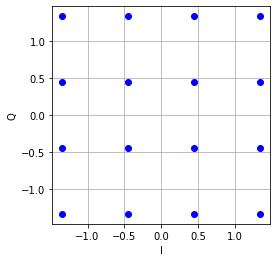

32.0


In [0]:
#Plot constellation for sanity check
data = []
for i in range(16):
  data.append(coord_dict[i])
data = np.array(data)/np.sqrt(5)
#data = data.reshape(M,2,1)
plt.plot(data[:,0],data[:,1],'bo')
plt.grid()
plt.xlabel('I')
plt.ylabel('Q')
plt.axis('square')
plt.show()
print(np.sum(np.square(data)))

In [0]:
#Test error
k = 4
n = 2
R = k/n
dat_size=10000000
xs = np.random.randint(16,size=dat_size).tolist()
coords = [coord_dict[x] for x in xs]
coords_array = np.asarray(coords)
EbNo_range_dB = list(np.arange(0,15,2))
ber= [None]*len(EbNo_range_dB)
for iter1 in range(len(EbNo_range_dB)):
    EbNo = 10**(EbNo_range_dB[iter1]/10.0)
    noise_std = np.sqrt(1/(2*R*EbNo))*scaling
    noise = noise_std*np.random.randn(dat_size,n)
    sig_in = coords_array + noise
    predicted_coords = [rect_decod(tuple(signal)) for signal in sig_in.tolist()]
    count=0
    for i in range(len(predicted_coords)):
        if predicted_coords[i]!=(coords_array[i,0],coords_array[i,1]):
            count+=1
    ber[iter1] = count/dat_size
    print('EbNo(dB):',EbNo_range_dB[iter1],'SER',ber[iter1])

EbNo(dB): 0 SER 0.4792039
EbNo(dB): 2 SER 0.3522435
EbNo(dB): 4 SER 0.2205529
EbNo(dB): 6 SER 0.1084602
EbNo(dB): 8 SER 0.0366116
EbNo(dB): 10 SER 0.007034
EbNo(dB): 12 SER 0.0005515
EbNo(dB): 14 SER 1.26e-05


In [0]:
#sandbox
print(ber)
print(count)

[0.4792039, 0.3522435, 0.2205529, 0.1084602, 0.0366116, 0.007034, 0.0005515, 1.26e-05]
126


In [0]:
#Test error with processing noise relative to channel noise (this and next block)
k = 4
n = 2
R = k/n
dat_size=1000000
xs = np.random.randint(16,size=dat_size).tolist()
coords = [coord_dict[x] for x in xs]
coords_array = np.asarray(coords)

In [0]:
#Only let one of these be longer than 1 element
EbNo_range_dB = list(np.arange(0,16,1.5))
EbNo_diff_proc = 0
ber= [None]*len(EbNo_range_dB)
for iter1 in range(len(EbNo_range_dB)):
  #determine linear noise magnitudes
  EbNo = 10**(EbNo_range_dB[iter1]/10.0)
  EbNo_proc = 10**((EbNo_diff_proc+EbNo_range_dB[iter1])/10.0)
  noise_std = np.sqrt(1/(2*R*EbNo))*scaling
  noise_std_proc = np.sqrt(1/(2*R*EbNo_proc))*scaling
  #Create noise vectors
  noise = noise_std*np.random.randn(dat_size,n)
  noise_proc = noise_std_proc*np.random.randn(dat_size,n)
  #add noise to input, demodulate
  sig_in = coords_array + noise+noise_proc
  predicted_coords = [rect_decod(tuple(signal)) for signal in sig_in.tolist()]
  # count number of incorrect demodulations, print
  count=0
  for i in range(len(predicted_coords)):
    if predicted_coords[i]!=(coords_array[i,0],coords_array[i,1]):
       count+=1
  ber[iter1] = count/dat_size
  print('Channel EbNo(dB):',EbNo_range_dB[iter1],'Processing EbNo(dB):',EbNo_diff_proc+EbNo_range_dB[iter1],'SER',ber[iter1])

Channel EbNo(dB): 0.0 Processing EbNo(dB): 0.0 SER 0.633939
Channel EbNo(dB): 1.5 Processing EbNo(dB): 1.5 SER 0.563375
Channel EbNo(dB): 3.0 Processing EbNo(dB): 3.0 SER 0.47853
Channel EbNo(dB): 4.5 Processing EbNo(dB): 4.5 SER 0.385671
Channel EbNo(dB): 6.0 Processing EbNo(dB): 6.0 SER 0.286414
Channel EbNo(dB): 7.5 Processing EbNo(dB): 7.5 SER 0.190302
Channel EbNo(dB): 9.0 Processing EbNo(dB): 9.0 SER 0.108672
Channel EbNo(dB): 10.5 Processing EbNo(dB): 10.5 SER 0.050549
Channel EbNo(dB): 12.0 Processing EbNo(dB): 12.0 SER 0.017744
Channel EbNo(dB): 13.5 Processing EbNo(dB): 13.5 SER 0.004188
Channel EbNo(dB): 15.0 Processing EbNo(dB): 15.0 SER 0.000594


In [0]:
#Calculate theoretical error rate for rectangular QAM
M=16
L=np.sqrt(M)
EbNo_range_dB = list(np.arange(0,21,2))
for iter1 in range(len(EbNo_range_dB)):
  EbNo=10**(EbNo_range_dB[iter1]/10.0)
  Q_out = norm.sf(np.sqrt(3*np.log2(M)*EbNo/(M-1)))
  SER=1-(1-((2*L-2)/L*Q_out))**2
  print('EbNo (dB) =',EbNo_range_dB[iter1],'SER =',SER)

EbNo (dB) = 0 SER = 0.4791780167757098
EbNo (dB) = 2 SER = 0.3521661005621841
EbNo (dB) = 4 SER = 0.2207293354761536
EbNo (dB) = 6 SER = 0.10837798641478547
EbNo (dB) = 8 SER = 0.03664681110244028
EbNo (dB) = 10 SER = 0.0070042942940099495
EbNo (dB) = 12 SER = 0.0005545578503225457
EbNo (dB) = 14 SER = 1.105280146551646e-05
EbNo (dB) = 16 SER = 2.5000803094421542e-08
EbNo (dB) = 18 SER = 1.80899739632423e-12
EbNo (dB) = 20 SER = 0.0


#64 QAM:

In [0]:
# coord dict
coord_dict64 = {
    0  : (-7, 7),
    1  : (-7, 5),
    2  : (-7, 1),
    3  : (-7, 3),
    4  : (-7, -7),
    5  : (-7, -5),
    6  : (-7, -1),
    7  : (-7, -3),
    8  : (-5, 7),
    9  : (-5, 5),
    10 : (-5, 1),
    11 : (-5, 3),
    12 : (-5, -7),
    13 : (-5, -5),
    14 : (-5, -1),
    15 : (-5, -3),
    16 : (-1, 7),
    17 : (-1, 5),
    18 : (-1, 1),
    19 : (-1, 3),
    20 : (-1, -7),
    21 : (-1, -5),
    22 : (-1, -1),
    23 : (-1, -3),
    24 : (-3, 7),
    25 : (-3, 5),
    26 : (-3, 1),
    27 : (-3, 3),
    28 : (-3, -7),
    29 : (-3, -5),
    30 : (-3, -1),
    31 : (-3, -3),
    32 : (7, 7),
    33 : (7, 5),
    34 : (7, 1),
    35 : (7, 3),
    36 : (7, -7),
    37 : (7, -5),
    38 : (7, -1),
    39 : (7, -3),
    40 : (5, 7),
    41 : (5, 5),
    42 : (5, 1),
    43 : (5, 3),
    44 : (5, -7),
    45 : (5, -5),
    46 : (5, -1),
    47 : (5, -3),
    48 : (1, 7),
    49 : (1, 5),
    50 : (1, 1),
    51 : (1, 3),
    52 : (1, -7),
    53 : (1, -5),
    54 : (1, -1),
    55 : (1, -3),
    56 : (3, 7),
    57 : (3, 5),
    58 : (3, 1),
    59 : (3, 3),
    60 : (3, -7),
    61 : (3, -5),
    62 : (3, -1),
    63 : (3, -3),
    }

num_dict64 = {coords: num for num, coords in coord_dict64.items()}

In [0]:
#Decoding
def rect_decod64(coords):
    '''
    Returns the coordinates of the closest element of the constellation from a 
    given set of coordinates for 64 QAM
    '''
    x,y = coords[0],coords[1]
    output=[]
    #Get X band
    if x >=0: #X>0
      if x>=4: #X=5 or 7
        if x>=6: #right eightth
          output.append(7) #x=7
        else:#X=5
          output.append(5)
      else: #X=1 or 3
        if x>=2:
          output.append(3)
        else:
          output.append(1)
    else: # X<0
      if x>=-4:
        if x>=-2:
          output.append(-1)
        else:
          output.append(-3)
      else: #x<-4
        if x>=-6:
          output.append(-5)
        else:
          output.append(-7)
    #Get Y band
    if y >=0:
      if y>=4: #y=5 or 7
        if y>=6:
          output.append(7)
        else:#y=5
          output.append(5)
      else: #y=1 or 3
        if y>=2:
          output.append(3)
        else:
          output.append(1)
    else: # y<0
      if y>=-4:
        if y>=-2:
          output.append(-1)
        else:
          output.append(-3)
      else: #y<-4
        if y>=-6:
          output.append(-5)
        else:
          output.append(-7)
    return tuple(output)

In [0]:
#Get energy for scaling
energy=0
n=2
for iter1 in np.arange(64):
    symbol_energy=coord_dict64.get(iter1)[0]**2+coord_dict64.get(iter1)[1]**2
    energy += symbol_energy/64
print('average energy =',energy)
scaling=np.sqrt(energy/n)

average energy = 42.0


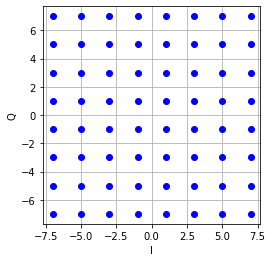

In [0]:
#Plot constellation for sanity check
data = []
for i in range(64):
  data.append(coord_dict64[i])
data = np.array(data)
#data = data.reshape(M,2,1)
plt.plot(data[:,0],data[:,1],'bo')
plt.grid()
plt.xlabel('I')
plt.ylabel('Q')
plt.axis('square')
plt.show()

In [0]:
#sanity check on decoder:
for i in range(64):
  if num_dict64[rect_decod64(coord_dict64[i])]!=i:
    print('oops')

In [0]:
#Test error with processing noise relative to channel noise (this and next block)
k = 6
n = 2
R = k/n
dat_size=1000000
xs = np.random.randint(64,size=dat_size).tolist()
coords = [coord_dict64[x] for x in xs]
coords_array = np.asarray(coords)

In [0]:
EbNo_range_dB = list(np.arange(22,30,1))
EbNo_diff_proc = -10
ber= [None]*len(EbNo_range_dB)
for iter1 in range(len(EbNo_range_dB)):
  #determine linear noise magnitudes
  EbNo = 10**(EbNo_range_dB[iter1]/10.0)
  EbNo_proc = 10**((EbNo_diff_proc+EbNo_range_dB[iter1])/10.0)
  noise_std = np.sqrt(1/(2*R*EbNo))*scaling
  noise_std_proc = np.sqrt(1/(2*R*EbNo_proc))*scaling
  #Create noise vectors
  noise = noise_std*np.random.randn(dat_size,n)
  noise_proc = noise_std_proc*np.random.randn(dat_size,n)
  #add noise to input, demodulate
  sig_in = coords_array + noise+noise_proc
  predicted_coords = [rect_decod64(tuple(signal)) for signal in sig_in.tolist()]
  # count number of incorrect demodulations, print
  count=0
  for i in range(dat_size):
    if predicted_coords[i]!=(coords_array[i,0],coords_array[i,1]):
      count+=1
  ber[iter1] = count/dat_size
  print('Channel EbNo(dB):',EbNo_range_dB[iter1],'Processing EbNo(dB):',EbNo_diff_proc+EbNo_range_dB[iter1],'SER',ber[iter1])

Channel EbNo(dB): 22 Processing EbNo(dB): 12 SER 0.072798
Channel EbNo(dB): 23 Processing EbNo(dB): 13 SER 0.039534
Channel EbNo(dB): 24 Processing EbNo(dB): 14 SER 0.018329
Channel EbNo(dB): 25 Processing EbNo(dB): 15 SER 0.007257
Channel EbNo(dB): 26 Processing EbNo(dB): 16 SER 0.002266
Channel EbNo(dB): 27 Processing EbNo(dB): 17 SER 0.000552
Channel EbNo(dB): 28 Processing EbNo(dB): 18 SER 7.7e-05
Channel EbNo(dB): 29 Processing EbNo(dB): 19 SER 1.1e-05


In [0]:
#Calculate theoretical error rate for rectangular QAM
M=64
L=np.sqrt(M)
EbNo_range_dB = list(np.arange(0,16,1.5))
for iter1 in range(len(EbNo_range_dB)):
  EbNo=10**(EbNo_range_dB[iter1]/10.0)
  Q_out = norm.sf(np.sqrt(3*np.log2(M)*EbNo/(M-1)))
  SER=1-(1-((2*L-2)/L*Q_out))**2
  print('EbNo (dB) =',EbNo_range_dB[iter1],'SER =',SER)

In [0]:
#sandbox
print(ber)

[0.072798, 0.039534, 0.018329, 0.007257, 0.002266, 0.000552, 7.7e-05, 1.1e-05]


#256 QAM


In [0]:
coord_dict256 = {
    0   : (-15  ,15),
    1   : (-15  ,13),
    2   : (-15  ,9),
    3   : (-15  ,11),
    4   : (-15  ,1),
    5   : (-15  ,3),
    6   : (-15  ,7),
    7   : (-15  ,5),
    8   : (-15  ,-15),
    9   : (-15  ,-13),
    10   : (-15  ,-9),
    11   : (-15  ,-11),
    12   : (-15  ,-1),
    13   : (-15  ,-3),
    14   : (-15  ,-7),
    15   : (-15  ,-5),
    16   : (-13  ,15),
    17   : (-13  ,13),
    18   : (-13  ,9),
    19   : (-13  ,11),
    20   : (-13  ,1),
    21   : (-13  ,3),
    22   : (-13  ,7),
    23   : (-13  ,5),
    24   : (-13  ,-15),
    25   : (-13  ,-13),
    26   : (-13  ,-9),
    27   : (-13  ,-11),
    28   : (-13  ,-1),
    29   : (-13  ,-3),
    30   : (-13  ,-7),
    31   : (-13  ,-5),
    32   : (-9  ,15),
    33   : (-9  ,13),
    34   : (-9  ,9),
    35   : (-9  ,11),
    36   : (-9  ,1),
    37   : (-9  ,3),
    38   : (-9  ,7),
    39   : (-9  ,5),
    40   : (-9  ,-15),
    41   : (-9  ,-13),
    42   : (-9  ,-9),
    43   : (-9  ,-11),
    44   : (-9  ,-1),
    45   : (-9  ,-3),
    46   : (-9  ,-7),
    47   : (-9  ,-5),
    48   : (-11  ,15),
    49   : (-11  ,13),
    50   : (-11  ,9),
    51   : (-11  ,11),
    52   : (-11  ,1),
    53   : (-11  ,3),
    54   : (-11  ,7),
    55   : (-11  ,5),
    56   : (-11  ,-15),
    57   : (-11  ,-13),
    58   : (-11  ,-9),
    59   : (-11  ,-11),
    60   : (-11  ,-1),
    61   : (-11  ,-3),
    62   : (-11  ,-7),
    63   : (-11  ,-5),
    64   : (-1  ,15),
    65   : (-1  ,13),
    66   : (-1  ,9),
    67   : (-1  ,11),
    68   : (-1  ,1),
    69   : (-1  ,3),
    70   : (-1  ,7),
    71   : (-1  ,5),
    72   : (-1  ,-15),
    73   : (-1  ,-13),
    74   : (-1  ,-9),
    75   : (-1  ,-11),
    76   : (-1  ,-1),
    77   : (-1  ,-3),
    78   : (-1  ,-7),
    79   : (-1  ,-5),
    80   : (-3  ,15),
    81   : (-3  ,13),
    82   : (-3  ,9),
    83   : (-3  ,11),
    84   : (-3  ,1),
    85   : (-3  ,3),
    86   : (-3  ,7),
    87   : (-3  ,5),
    88   : (-3  ,-15),
    89   : (-3  ,-13),
    90   : (-3  ,-9),
    91   : (-3  ,-11),
    92   : (-3  ,-1),
    93   : (-3  ,-3),
    94   : (-3  ,-7),
    95   : (-3  ,-5),
    96   : (-7  ,15),
    97   : (-7  ,13),
    98   : (-7  ,9),
    99   : (-7  ,11),
    100   : (-7  ,1),
    101   : (-7  ,3),
    102   : (-7  ,7),
    103   : (-7  ,5),
    104   : (-7  ,-15),
    105   : (-7  ,-13),
    106   : (-7  ,-9),
    107   : (-7  ,-11),
    108   : (-7  ,-1),
    109   : (-7  ,-3),
    110   : (-7  ,-7),
    111   : (-7  ,-5),
    112   : (-5  ,15),
    113   : (-5  ,13),
    114   : (-5  ,9),
    115   : (-5  ,11),
    116   : (-5  ,1),
    117   : (-5  ,3),
    118   : (-5  ,7),
    119   : (-5  ,5),
    120   : (-5  ,-15),
    121   : (-5  ,-13),
    122   : (-5  ,-9),
    123   : (-5  ,-11),
    124   : (-5  ,-1),
    125   : (-5  ,-3),
    126   : (-5  ,-7),
    127   : (-5  ,-5),
    128   : (15  ,15),
    129   : (15  ,13),
    130   : (15  ,9),
    131   : (15  ,11),
    132   : (15  ,1),
    133   : (15  ,3),
    134   : (15  ,7),
    135   : (15  ,5),
    136   : (15  ,-15),
    137   : (15  ,-13),
    138   : (15  ,-9),
    139   : (15  ,-11),
    140   : (15  ,-1),
    141   : (15  ,-3),
    142   : (15  ,-7),
    143   : (15  ,-5),
    144   : (13  ,15),
    145   : (13  ,13),
    146   : (13  ,9),
    147   : (13  ,11),
    148   : (13  ,1),
    149   : (13  ,3),
    150   : (13  ,7),
    151   : (13  ,5),
    152   : (13  ,-15),
    153   : (13  ,-13),
    154   : (13  ,-9),
    155   : (13  ,-11),
    156   : (13  ,-1),
    157   : (13  ,-3),
    158   : (13  ,-7),
    159   : (13  ,-5),
    160   : (9  ,15),
    161   : (9  ,13),
    162   : (9  ,9),
    163   : (9  ,11),
    164   : (9  ,1),
    165   : (9  ,3),
    166   : (9  ,7),
    167   : (9  ,5),
    168   : (9  ,-15),
    169   : (9  ,-13),
    170   : (9  ,-9),
    171   : (9  ,-11),
    172   : (9  ,-1),
    173   : (9  ,-3),
    174   : (9  ,-7),
    175   : (9  ,-5),
    176   : (11  ,15),
    177   : (11  ,13),
    178   : (11  ,9),
    179   : (11  ,11),
    180   : (11  ,1),
    181   : (11  ,3),
    182   : (11  ,7),
    183   : (11  ,5),
    184   : (11  ,-15),
    185   : (11  ,-13),
    186   : (11  ,-9),
    187   : (11  ,-11),
    188   : (11  ,-1),
    189   : (11  ,-3),
    190   : (11  ,-7),
    191   : (11  ,-5),
    192   : (1  ,15),
    193   : (1  ,13),
    194   : (1  ,9),
    195   : (1  ,11),
    196   : (1  ,1),
    197   : (1  ,3),
    198   : (1  ,7),
    199   : (1  ,5),
    200   : (1  ,-15),
    201   : (1  ,-13),
    202   : (1  ,-9),
    203   : (1  ,-11),
    204   : (1  ,-1),
    205   : (1  ,-3),
    206   : (1  ,-7),
    207   : (1  ,-5),
    208   : (3  ,15),
    209   : (3  ,13),
    210   : (3  ,9),
    211   : (3  ,11),
    212   : (3  ,1),
    213   : (3  ,3),
    214   : (3  ,7),
    215   : (3  ,5),
    216   : (3  ,-15),
    217   : (3  ,-13),
    218   : (3  ,-9),
    219   : (3  ,-11),
    220   : (3  ,-1),
    221   : (3  ,-3),
    222   : (3  ,-7),
    223   : (3  ,-5),
    224   : (7  ,15),
    225   : (7  ,13),
    226   : (7  ,9),
    227   : (7  ,11),
    228   : (7  ,1),
    229   : (7  ,3),
    230   : (7  ,7),
    231   : (7  ,5),
    232   : (7  ,-15),
    233   : (7  ,-13),
    234   : (7  ,-9),
    235   : (7  ,-11),
    236   : (7  ,-1),
    237   : (7  ,-3),
    238   : (7  ,-7),
    239   : (7  ,-5),
    240   : (5  ,15),
    241   : (5  ,13),
    242   : (5  ,9),
    243   : (5  ,11),
    244   : (5  ,1),
    245   : (5  ,3),
    246   : (5  ,7),
    247   : (5  ,5),
    248   : (5  ,-15),
    249   : (5  ,-13),
    250   : (5  ,-9),
    251   : (5  ,-11),
    252   : (5  ,-1),
    253   : (5  ,-3),
    254   : (5  ,-7),
    255   : (5  ,-5),
}
num_dict256 = {coords: num for num, coords in coord_dict256.items()}

In [0]:
#Decoding
def rect_decod256(coords):
    '''
    Returns the coordinates of the closest element of the constellation from a 
    given set of coordinates for 64 QAM
    '''
    x,y = coords[0],coords[1]
    output=[]
    #Get X band
    if x >=0: 
      if x>=8:
        if x>=12:
          if x>=14:
            output.append(15)
          else:
            output.append(13)
        else:
          if x>=10:
            output.append(11)
          else:
            output.append(9)
      else:
        if x>=4:
          if x>=6:
            output.append(7)
          else:
            output.append(5)
        else:
          if x>=2:
            output.append(3)
          else:
            output.append(1)
    else: #x<0
      if x>=-8:
        if x>=-4:
          if x>=-2:
            output.append(-1)
          else:
            output.append(-3)
        else:
          if x>=-6:
            output.append(-5)
          else:
            output.append(-7)
      else:
        if x>=-12:
          if x>=-10:
            output.append(-9)
          else:
            output.append(-11)
        else:
          if x>=-14:
            output.append(-13)
          else:
            output.append(-15)
    #Get Y band
    if y >=0: 
      if y>=8:
        if y>=12:
          if y>=14:
            output.append(15)
          else:
            output.append(13)
        else:
          if y>=10:
            output.append(11)
          else:
            output.append(9)
      else:
        if y>=4:
          if y>=6:
            output.append(7)
          else:
            output.append(5)
        else:
          if y>=2:
            output.append(3)
          else:
            output.append(1)
    else: #y<0
      if y>=-8:
        if y>=-4:
          if y>=-2:
            output.append(-1)
          else:
            output.append(-3)
        else:
          if y>=-6:
            output.append(-5)
          else:
            output.append(-7)
      else:
        if y>=-12:
          if y>=-10:
            output.append(-9)
          else:
            output.append(-11)
        else:
          if y>=-14:
            output.append(-13)
          else:
            output.append(-15)
    return tuple(output)

In [4]:
#Get energy for scaling
energy=0
n=2
for iter1 in np.arange(256):
    symbol_energy=coord_dict256.get(iter1)[0]**2+coord_dict256.get(iter1)[1]**2
    energy += symbol_energy/256
print('average energy =',energy)
scaling=np.sqrt(energy/n)

average energy = 170.0


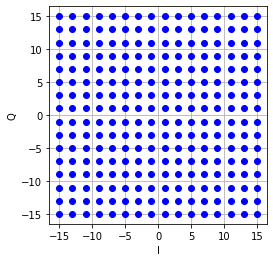

In [0]:
#Plot constellation for sanity check
data = []
for i in range(256):
  data.append(coord_dict256[i])
data = np.array(data)
#data = data.reshape(M,2,1)
plt.plot(data[:,0],data[:,1],'bo')
plt.grid()
plt.xlabel('I')
plt.ylabel('Q')
plt.axis('square')
plt.show()

In [0]:
#Test error with processing noise relative to channel noise (this and next block)
k = 8
n = 2
R = k/n
dat_size=1000000
xs = np.random.randint(256,size=dat_size).tolist()
coords = [coord_dict256[x] for x in xs]
coords_array = np.asarray(coords)

In [7]:
EbNo_range_dB = list(np.arange(16,27,1))
EbNo_diff_proc = 0
ber= [None]*len(EbNo_range_dB)
for iter1 in range(len(EbNo_range_dB)):
  #determine linear noise magnitudes
  EbNo = 10**(EbNo_range_dB[iter1]/10.0)
  EbNo_proc = 10**((EbNo_diff_proc+EbNo_range_dB[iter1])/10.0)
  noise_std = np.sqrt(1/(2*R*EbNo))*scaling
  noise_std_proc = np.sqrt(1/(2*R*EbNo_proc))*scaling
  #Create noise vectors
  noise = noise_std*np.random.randn(dat_size,n)
  noise_proc = noise_std_proc*np.random.randn(dat_size,n)
  #add noise to input, demodulate
  sig_in = coords_array + noise+noise_proc
  predicted_coords = [rect_decod256(tuple(signal)) for signal in sig_in.tolist()]
  # count number of incorrect demodulations, print
  count=0
  for i in range(dat_size):
    if predicted_coords[i]!=(coords_array[i,0],coords_array[i,1]):
      count+=1
  ber[iter1] = count/dat_size
  print('Channel EbNo(dB):',EbNo_range_dB[iter1],'Processing EbNo(dB):',EbNo_diff_proc+EbNo_range_dB[iter1],'SER',ber[iter1])

Channel EbNo(dB): 16 Processing EbNo(dB): 16 SER 0.295101
Channel EbNo(dB): 17 Processing EbNo(dB): 17 SER 0.220493
Channel EbNo(dB): 18 Processing EbNo(dB): 18 SER 0.152423
Channel EbNo(dB): 19 Processing EbNo(dB): 19 SER 0.097263
Channel EbNo(dB): 20 Processing EbNo(dB): 20 SER 0.055987
Channel EbNo(dB): 21 Processing EbNo(dB): 21 SER 0.027561
Channel EbNo(dB): 22 Processing EbNo(dB): 22 SER 0.011832
Channel EbNo(dB): 23 Processing EbNo(dB): 23 SER 0.004028
Channel EbNo(dB): 24 Processing EbNo(dB): 24 SER 0.001145
Channel EbNo(dB): 25 Processing EbNo(dB): 25 SER 0.000208
Channel EbNo(dB): 26 Processing EbNo(dB): 26 SER 2.8e-05


In [8]:
print(ber)

[0.295101, 0.220493, 0.152423, 0.097263, 0.055987, 0.027561, 0.011832, 0.004028, 0.001145, 0.000208, 2.8e-05]
